# Pizzageon

Renaissance du projet pizzageon, petit dataset contenant des pizzas et des pigeons. Le but sera d'entraîner un réseau neuronal classique et un réseau convolutionnel pour comparer les performances.

## Le dataset

### Import


In [1]:
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

class Dataset:
    target = None
    data = None

In [2]:
 with open("dataset.pkl", "rb") as file:
    dataset = pickle.load(file)
    
dataset

Exemples

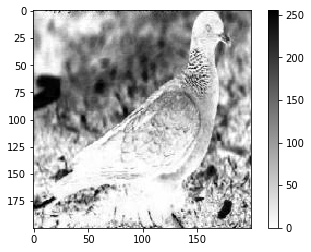

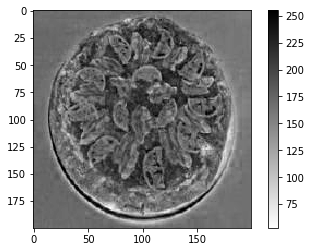

In [3]:
def plot_image(array_img):
	plt.figure()
	plt.imshow(array_img, cmap=plt.cm.binary)
	plt.colorbar()
	plt.grid(False)
	plt.show()
    

pigeon_ex = dataset.data[0]
pizza_ex = dataset.data[-1]

# Plot la composante Rouge
plot_image(pigeon_ex[0])
plot_image(pizza_ex[0])

## Preprocessing
### Converting from channel_first to channel_last format in order to allow keras to work with tensorflow backend


In [4]:
print(dataset.data[0, :, 0, 0])
dataset.data = dataset.data.swapaxes(1, 3) # chan <-> width
dataset.data = dataset.data.swapaxes(1, 2) # width <-> height
print(dataset.data[0, 0, 0, :])

[55 74 44]
[55 74 44]


### Normalisation

In [5]:
dataset.data = dataset.data / 255

dataset.data[-1]

array([[[0.62745098, 0.3372549 , 0.38823529],
        [0.63529412, 0.34509804, 0.39607843],
        [0.64705882, 0.35686275, 0.40784314],
        ...,
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902]],

       [[0.63921569, 0.34901961, 0.4       ],
        [0.64313725, 0.35294118, 0.40392157],
        [0.65098039, 0.36078431, 0.41176471],
        ...,
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902]],

       [[0.65098039, 0.36078431, 0.41176471],
        [0.65490196, 0.36470588, 0.41568627],
        [0.65882353, 0.36862745, 0.41960784],
        ...,
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902]],

       ...,

       [[0.6627451 , 0.37254902, 0.42352941],
        [0.6627451 , 0.37254902, 0.42352941],
        [0.6627451 , 0

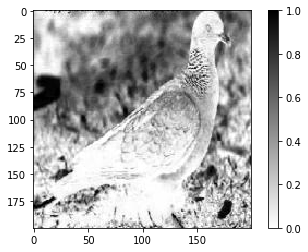

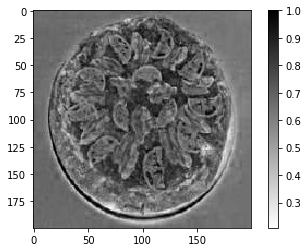

In [6]:
# Plot la composante Rouge après normalisation pour vérification
pigeon_ex = dataset.data[0]
pizza_ex = dataset.data[-1]
plot_image(pigeon_ex[:, :, 0])
plot_image(pizza_ex[:, :, 0])

### Shuffle the dataset

In [7]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

dataset.target, dataset.data = shuffle_in_unison(dataset.target, dataset.data)

In [8]:
# Test
a = np.random.rand(50)
b = a.copy()

a, b = shuffle_in_unison(a, b)
assert (a == b).all()

In [9]:
idx = np.random.randint(dataset.target.size)
ex_1 = (dataset.data[idx], dataset.target[idx])

idx = np.random.randint(dataset.target.size)
ex_2 = (dataset.data[idx], dataset.target[idx])

idx = np.random.randint(dataset.target.size)
ex_3 = (dataset.data[idx], dataset.target[idx])

L'image devrait représenter :  Pigeon


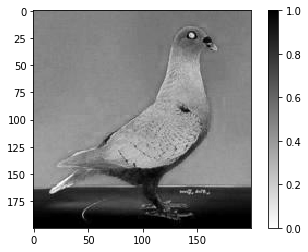

L'image devrait représenter :  Pigeon


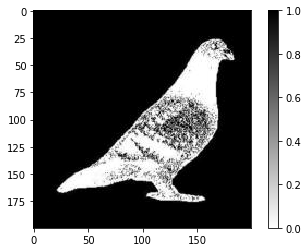

L'image devrait représenter :  Pizza


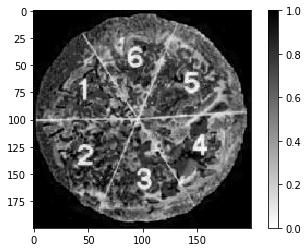

In [10]:
# plot la composante rouge de l'image de l'exemple 1
label = ["Pigeon", "Pizza"]
print("L'image devrait représenter : ", label[ex_1[1]])
plot_image(ex_1[0][:, :, 0])

print("L'image devrait représenter : ", label[ex_2[1]])
plot_image(ex_2[0][:, :, 0])

print("L'image devrait représenter : ", label[ex_3[1]])
plot_image(ex_3[0][:, :, 0])

## Vanilla NN

### build

In [11]:
model_nn = tf.keras.Sequential()
model_nn.add(tf.keras.layers.Flatten(input_shape=(200, 200, 3)))
model_nn.add(tf.keras.layers.Dense(128, activation='relu'))
model_nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

W0826 10:06:05.935130 140545877346112 deprecation.py:506] From /home/alex/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### compile

In [12]:
model_nn.compile(optimizer="adam",
             loss='binary_crossentropy',
             metrics=['accuracy'])

W0826 10:06:06.072629 140545877346112 deprecation.py:323] From /home/alex/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


###test

In [13]:
print((model_nn.predict(dataset.data[:3])))
print(dataset.target[:3])

[[0.36655876]
 [0.52095014]
 [0.4971371 ]]
[1 1 1]


### train

In [14]:
EPOCHS = 30

history = model_nn.fit(dataset.data, dataset.target, epochs=EPOCHS, validation_split = 0.2)

Train on 101 samples, validate on 26 samples
Epoch 1/30
101/101 [==============================] - 2s 18ms/sample - loss: 30.5243 - acc: 0.5248 - val_loss: 23.0875 - val_acc: 0.4231
Epoch 2/30
101/101 [==============================] - 1s 8ms/sample - loss: 29.3653 - acc: 0.5248 - val_loss: 1.9889 - val_acc: 0.7692
Epoch 3/30
101/101 [==============================] - 1s 7ms/sample - loss: 12.6731 - acc: 0.6436 - val_loss: 0.0912 - val_acc: 0.9615
Epoch 4/30
101/101 [==============================] - 1s 7ms/sample - loss: 4.5964 - acc: 0.8218 - val_loss: 0.3729 - val_acc: 0.9231
Epoch 5/30
101/101 [==============================] - 1s 7ms/sample - loss: 3.1844 - acc: 0.7624 - val_loss: 1.2735 - val_acc: 0.8846
Epoch 6/30
101/101 [==============================] - 1s 7ms/sample - loss: 1.0756 - acc: 0.9505 - val_loss: 1.0174e-07 - val_acc: 1.0000
Epoch 7/30
101/101 [==============================] - 1s 6ms/sample - loss: 1.1684 - acc: 0.9505 - val_loss: 0.8139 - val_acc: 0.9231
Epoch 8/

### Plot history

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


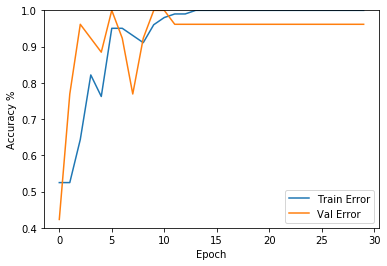

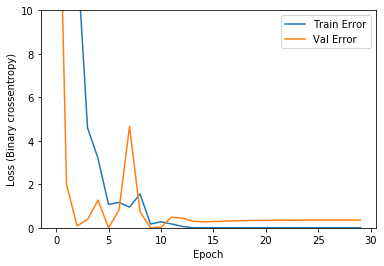

In [16]:
import pandas as pd

print(history.history.keys())

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy %')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Error')
  plt.ylim([0.4,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss (Binary crossentropy)')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,10])
  plt.legend()
  plt.show()

plot_history(history)

### Conclusion NN

Le réseau neuronal vanilla atteint une précision de 90% sur le set de validation

## CNN

### Build

Mauvaise façon de faire un CNN : que des conv2d suivis d'un flatten-dense. On obtient un nombre de paramètre énorme et une mauvaise généralisation. Les conv2d à la suite ne créent des features que sur des petites parties de l'image (on augmente de 2 la surface observée à chaque layer), alors qu'on cherche dans les convnets des features globales et non locales.

In [24]:
model_cnn = keras.Sequential()
model_cnn.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(200, 200, 3)))
model_cnn.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(1, activation='sigmoid'))

#### Quick look

In [25]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 64)      1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 196, 196, 32)      18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1229312)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1229313   
Total params: 1,249,569
Trainable params: 1,249,569
Non-trainable params: 0
_________________________________________________________________


### Compile

In [26]:
model_cnn.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])

### Test

In [27]:
print((model_cnn.predict(dataset.data[:3])))
print(dataset.target[:3])

[[0.49067032]
 [0.51207864]
 [0.4988514 ]]
[1 1 1]


### Train

In [28]:
EPOCHS = 10
cnn_history = model_cnn.fit(dataset.data, dataset.target, validation_split=0.2, epochs=EPOCHS)

Train on 101 samples, validate on 26 samples
Epoch 1/10
101/101 [==============================] - 14s 143ms/sample - loss: 8.4736 - acc: 0.4752 - val_loss: 0.6996 - val_acc: 0.7308
Epoch 2/10
101/101 [==============================] - 14s 134ms/sample - loss: 2.4835 - acc: 0.5941 - val_loss: 0.1285 - val_acc: 0.9615
Epoch 3/10
101/101 [==============================] - 14s 135ms/sample - loss: 0.3043 - acc: 0.9208 - val_loss: 0.0709 - val_acc: 1.0000
Epoch 4/10
101/101 [==============================] - 13s 131ms/sample - loss: 0.2671 - acc: 0.8515 - val_loss: 0.0451 - val_acc: 1.0000
Epoch 5/10
101/101 [==============================] - 14s 135ms/sample - loss: 0.2072 - acc: 0.9208 - val_loss: 0.1577 - val_acc: 0.9615
Epoch 6/10
101/101 [==============================] - 13s 132ms/sample - loss: 0.1210 - acc: 0.9505 - val_loss: 0.0140 - val_acc: 1.0000
Epoch 7/10
101/101 [==============================] - 14s 142ms/sample - loss: 0.0870 - acc: 0.9802 - val_loss: 0.3789 - val_acc: 0.8

### Plot history

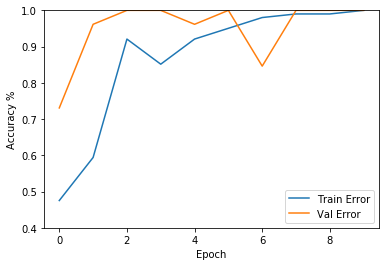

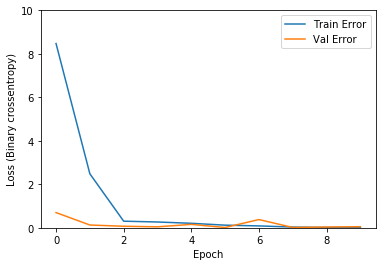

In [29]:
plot_history(cnn_history)

## Meilleur CNN

Cette fois on va utiliser des couches de max pooling pour améliorer les performances (plus rapide apprentissage) et diminuer le temps de convergence (réduction du nombre de paramètre).

In [30]:
model_mp = keras.Sequential()
# On change le nombre de filtres dans les conv2d, on met moins de filtres primitifs mais plus pour les features de haut niveau
model_mp.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(200, 200, 3)))
model_mp.add(keras.layers.MaxPooling2D((2, 2)))
model_mp.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model_mp.add(keras.layers.Flatten())
model_mp.add(keras.layers.Dense(1, activation='sigmoid'))

## compile

In [31]:
model_mp.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

### Test

In [32]:
print((model_mp.predict(dataset.data[:3])))
print(dataset.target[:3])

[[0.44506508]
 [0.44094318]
 [0.4333057 ]]
[1 1 1]


### Training

In [33]:
history = model_mp.fit(dataset.data, dataset.target, validation_split=0.2, epochs=EPOCHS)

Train on 101 samples, validate on 26 samples
Epoch 1/10
101/101 [==============================] - 6s 55ms/sample - loss: 8.0489 - acc: 0.4851 - val_loss: 5.4372 - val_acc: 0.5769
Epoch 2/10
101/101 [==============================] - 4s 44ms/sample - loss: 4.1557 - acc: 0.5149 - val_loss: 1.3103 - val_acc: 0.5385
Epoch 3/10
101/101 [==============================] - 4s 44ms/sample - loss: 1.6448 - acc: 0.5545 - val_loss: 0.6851 - val_acc: 0.5769
Epoch 4/10
101/101 [==============================] - 4s 44ms/sample - loss: 0.2584 - acc: 0.8614 - val_loss: 0.2539 - val_acc: 0.8846
Epoch 5/10
101/101 [==============================] - 5s 46ms/sample - loss: 0.2657 - acc: 0.8812 - val_loss: 0.1439 - val_acc: 1.0000
Epoch 6/10
101/101 [==============================] - 4s 43ms/sample - loss: 0.1397 - acc: 0.9505 - val_loss: 0.2157 - val_acc: 0.9231
Epoch 7/10
101/101 [==============================] - 4s 41ms/sample - loss: 0.1169 - acc: 0.9604 - val_loss: 0.0501 - val_acc: 1.0000
Epoch 8/10

### Plot history

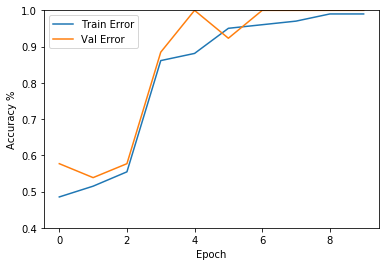

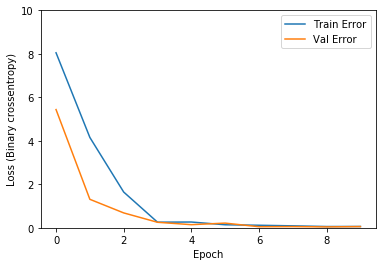

In [36]:
plot_history(history)

## Comparaisons

Il suffit de 5-10 itérations au CNN naïf pour converger et atteinder une précision de 100% sur le dataset, tandis que le NN classique atteint au maximum ~90% sur le set de validation après une trentaine d'itérations.
Entre le CNN naïf et le CNN avec max pooling, on note que l'entraînement est entre deux et trois fois plus rapide par itération, on ne remarque que peu de différence de performances sur ce petit et simple dataset.